In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import zipfile
import shutil, os
fantasy_zip = zipfile.ZipFile("/content/drive/MyDrive/Pepper Dataset-3.zip")
fantasy_zip.extractall("/content/drive/My Drive")
fantasy_zip.close()

In [ ]:
!pip install tensorflow

In [4]:
base_dir="/content/drive/MyDrive/Pepper Dataset-3/Pepper Dataset-3"

In [5]:
#number of files in each class

import fnmatch
import os


for i in os.listdir(base_dir+"/train"):
    dir_name=base_dir+"/train/"+i
    numfiles = len([f for f in os.listdir(dir_name) if os.path.isfile(os.path.join(dir_name, f)) and f[0] != '.'])
    print(numfiles,i)

444 Pepper Green
666 Pepper Red
666 Pepper Yellow


In [6]:
#number of files in each class

import fnmatch
import os


for i in os.listdir(base_dir+"/test"):
    dir_name=base_dir+"/test/"+i
    numfiles = len([f for f in os.listdir(dir_name) if os.path.isfile(os.path.join(dir_name, f)) and f[0] != '.'])
    print(numfiles,i)

148 Pepper Green
222 Pepper Red
222 Pepper Yellow


In [7]:
import fnmatch
import os
import numpy as np
import pandas as pd
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

np.random.seed(41)

path = base_dir+"/train/"
train_label = []
train_img = []
label2num = {'Pepper Green':0,'Pepper Red':1,'Pepper Yellow':2}
num_classes = 3

for i in os.listdir(path):
    print(i)
    label_number = label2num[i]
    new_path = path+i+'/'
    for j in fnmatch.filter(os.listdir(new_path), '*.jpg'):
        temp_img = image.load_img(new_path+j, target_size=(128,128))
        train_label.append(label_number)
        temp_img = image.img_to_array(temp_img)
        train_img.append(temp_img)

train_img = np.array(train_img)
train_y=pd.get_dummies(train_label)
train_y = np.array(train_y)
train_img=preprocess_input(train_img)



print('Training data shape: ', train_img.shape)
print('Training labels shape: ', train_y.shape)



Pepper Green
Pepper Red
Pepper Yellow
Training data shape:  (1776, 128, 128, 3)
Training labels shape:  (1776, 3)


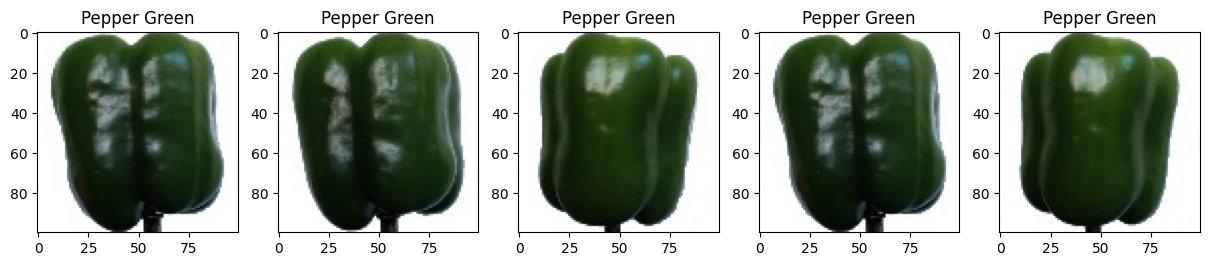

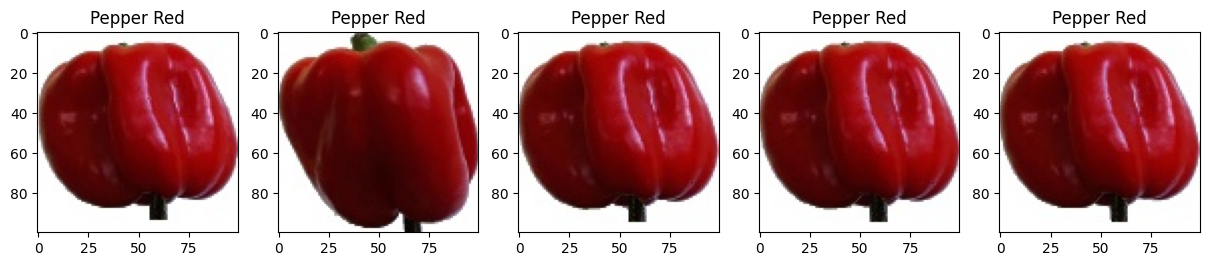

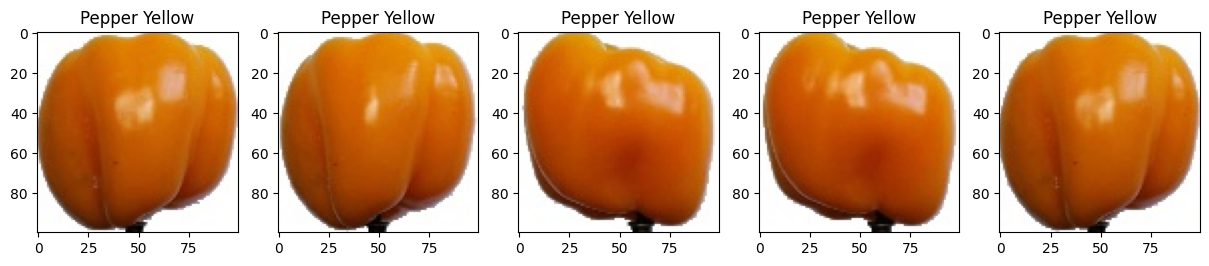

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import fnmatch

path = base_dir+"/train/"
num_samples = 5

for i in os.listdir(path):
      new_path = path+i+'/'
      k = 0
      fig, ax = plt.subplots(1,5)
      fig.set_size_inches(15, 15)
      for j in fnmatch.filter(os.listdir(new_path), '*.jpg'):
          if k < num_samples :
              img=mpimg.imread(new_path+j)
              # display images
              ax[k].set_title(i)
              ax[k].imshow(img);
              k = k + 1


In [9]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

In [10]:
import keras
from keras import models, layers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import GlobalMaxPooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

def new_model1(num_classes=None):

    base_model = applications.VGG16(weights= 'imagenet', include_top=False, input_shape= (128,128,3))

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    predictions = Dense(num_classes, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)


    return model





In [11]:
import keras
from keras import backend as K
num_classes=3
model = new_model1(num_classes)

model.compile(keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) # Use learning_rate instead of lr
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           1,5

 Total params: 14,716,227 (56.14 MB)

 Trainable params: 14,716,227 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Split training data into training dataset (70%) and validation dataset(15%) and testing dataset(15%)
from sklearn.model_selection import train_test_split
X_train1, X_valid, Y_train1, Y_valid=train_test_split(train_img,train_y,test_size=0.15, random_state=42)
X_train, X_test, Y_train, Y_test=train_test_split(X_train1,Y_train1,test_size=0.15, random_state=42)


In [13]:

#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen_train = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True

)
gen_train.fit(X_train)



In [15]:
batch_size = 32
epochs = 10
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('/content/gdrive/My Drive/my_checkpoint/pepper.keras', monitor='val_loss', save_best_only=True)

history = model.fit(gen_train.flow(X_train, Y_train, batch_size=32, shuffle=True),
                    steps_per_epoch=(X_train.shape[0]//(4*batch_size)),
                    epochs=epochs,
                    validation_data=(X_valid,Y_valid),
                    callbacks=[model_checkpoint],
                    verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 1.0000 - loss: 3.7421e-08 - val_accuracy: 1.0000 - val_loss: 1.7859e-09
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 1.0000 - loss: 2.1206e-07 - val_accuracy: 1.0000 - val_loss: 2.5003e-08
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 1.0000 - loss: 4.1492e-08 - val_accuracy: 1.0000 - val_loss: 5.1791e-08
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 1.0000 - loss: 2.6963e-06 - val_accuracy: 1.0000 - val_loss: 6.2953e-08
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 4.9546e-07 - val_accuracy: 1.0000 - val_loss: 6.3399e-08
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 1.0000 - loss: 2.7033e-06 - val_accuracy: 1.0000 - val_loss: 5.2684e-08
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 1.0000 - loss: 2.9681e-06 - val_accuracy: 1.0000 - val_loss: 3.6165e-08
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/s

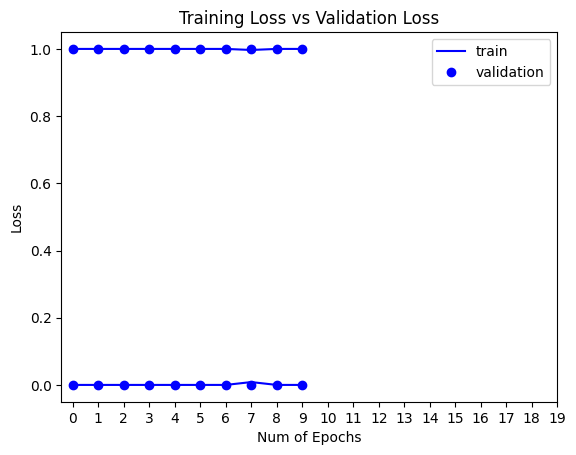

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(1)
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'bo')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'bo')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


In [17]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('/content/gdrive/My Drive/my_checkpoint/pepper.keras', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(X_valid,Y_valid),
                    shuffle=True,
                    callbacks=[model_checkpoint],
                    verbose=1)


Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 1.0000 - loss: 4.6234e-05 - val_accuracy: 1.0000 - val_loss: 7.0543e-08
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 1.0000 - loss: 7.3872e-07 - val_accuracy: 1.0000 - val_loss: 4.7326e-08
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 1.0000 - loss: 4.3121e-07 - val_accuracy: 1.0000 - val_loss: 4.0183e-08
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 1.0000 - loss: 3.6552e-07 - val_accuracy: 1.0000 - val_loss: 3.4825e-08
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 1.0000 - loss: 2.4892e-07 - val_accuracy: 1.0000 - val_loss: 3.0360e-08


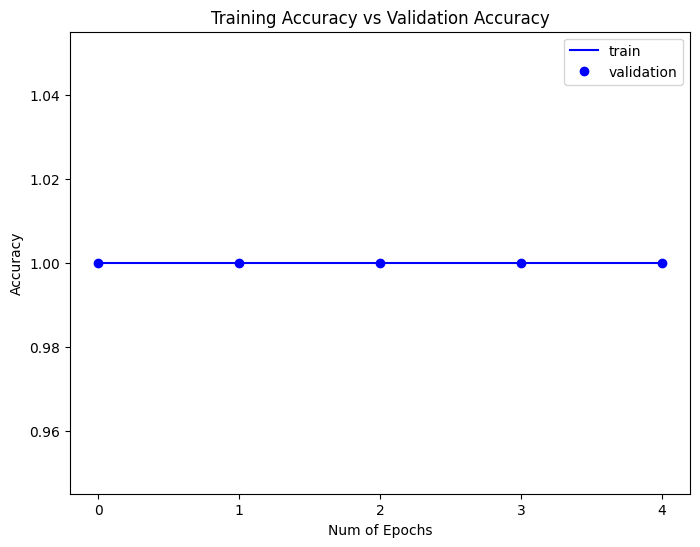

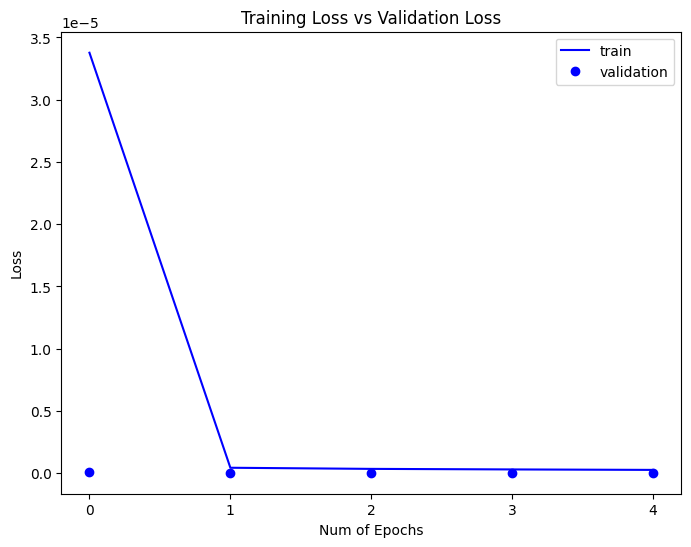

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(0)
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'bo')
plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'bo')
plt.xticks(np.arange(0, 5, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])



In [19]:
model.load_weights("/content/gdrive/My Drive/my_checkpoint/pepper.keras")


In [20]:
import fnmatch
import os
import numpy as np
import pandas as pd
# pre-trained model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

np.random.seed(21)
totalAll=0
countAll =0

path = base_dir+"/test/"
label2num = {'Pepper Green':0,'Pepper Red':1,'Pepper Yellow':2}
num2label = {0 : 'Pepper Green',1:'Pepper Red', 2:'Pepper Yellow'}


for i in os.listdir(path):

    label_number = label2num[i]
    new_path = path+i+'/'
    count=0
    total=0
    for j in fnmatch.filter(os.listdir(new_path), '*.jpg'):
        img = image.load_img(new_path+j, target_size=(128, 128) )
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        pred=model.predict(x)
        max_score =0.0
        lab=-1
        pred = pred[0]
        for k in range(num_classes):
            if (pred[k]>max_score):
                max_score=pred[k]
                lab=k

        file = num2label[lab]
        total=total+1
        if file == i:
             count=count+1
    countAll=countAll + count
    totalAll = totalAll + total
    print('count total : ', i, count, total)
print('acc= : ', countAll, totalAll, countAll/totalAll*100,'%')



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━

In [21]:
# Ensure that the directory exists using the os module
import os

# Define the directory and filename
save_dir = "/content/drive/MyDrive/my_checkpoint/"
filename = "pepper.weights.h5"

# Check if the directory exists, if not create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the full save path
save_path = os.path.join(save_dir, filename)

# Save the model weights
model.save_weights(save_path)


In [22]:
score = model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: {1:.4f}, Training Loss: {0:.4f}".format(score[0], score[1]))

score = model.evaluate(X_valid, Y_valid, verbose=0)
print("Validating Accuracy: {1:.4f}, Validating Loss: {0:.4f}".format(score[0], score[1]))

Training Accuracy: 1.0000, Training Loss: 0.0000
Validating Accuracy: 1.0000, Validating Loss: 0.0000


In [23]:
import time
start = time.time()

# Compute the final loss and accuracy
final_res = model.evaluate(X_test,Y_test)
print("Testing final accuracy: {1:.4f}, Testing Final loss: {0:.4f}".format(final_res[0], final_res[1]))
end = time.time()
print ("Time elapsed inb seconds:", end - start)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 1.0000 - loss: 7.8101e-08
Testing final accuracy: 1.0000, Testing Final loss: 0.0000
Time elapsed inb seconds: 5.210694074630737


In [24]:
preds = model.predict(X_test) # label scores
classpreds = np.argmax(preds, axis=1) # predicted classes
Y_testclass = np.argmax(Y_test, axis=1) # true classes

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [25]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [26]:
c_names = ['Pepper Green','Pepper Red','Pepper Yellow']
'''148 Pepper Green
222 Pepper Red
222 Pepper Yellow
total= 592'''
print(c_names)

['Pepper Green', 'Pepper Red', 'Pepper Yellow']


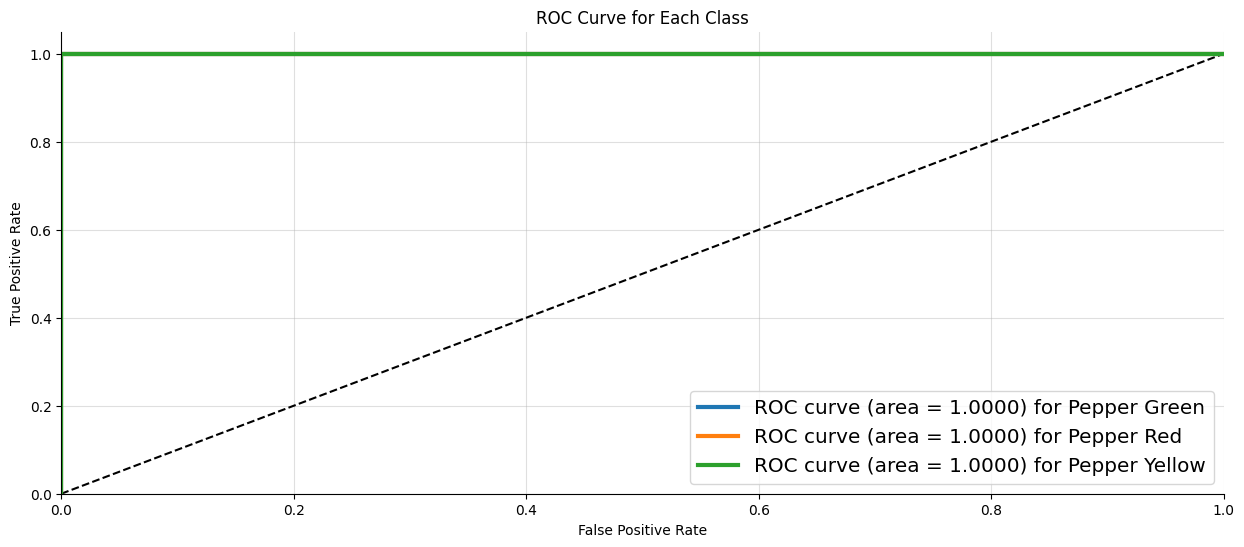

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Each Class')

for i in range(num_classes):
    ax.plot(fpr[i], tpr[i], linewidth=3, label='ROC curve (area = %0.4f) for %s' % (roc_auc[i], c_names[i]))
ax.legend(loc="best", fontsize='x-large')
ax.grid(alpha=.4)
sns.despine()
plt.show()

In [28]:
print(classification_report(Y_testclass, classpreds, target_names=c_names, digits=4))

               precision    recall  f1-score   support

 Pepper Green     1.0000    1.0000    1.0000        55
   Pepper Red     1.0000    1.0000    1.0000        76
Pepper Yellow     1.0000    1.0000    1.0000        96

     accuracy                         1.0000       227
    macro avg     1.0000    1.0000    1.0000       227
 weighted avg     1.0000    1.0000    1.0000       227



In [29]:
print(confusion_matrix(Y_testclass, classpreds))

[[55  0  0]
 [ 0 76  0]
 [ 0  0 96]]
